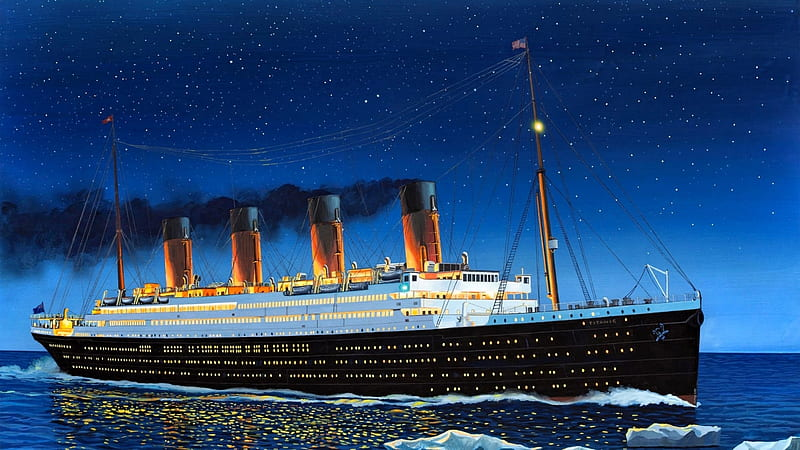

> ***TITANIC - MACHINE LEARNING FROM DISASTER***

A short summary related to Titanic incidence-

Titanic, British luxury passenger liner that sank on April 15, 1912, en route to New York from Southampton, England, on its maiden voyage,
On midnight April 14, it collided with an iceberg southeast of Cape Race, Newfoundland; five compartments ruptured and the ship sank. 
Around 1,500 of its 2,200 passengers died.

So, Here in this dataset, as a Data Science enthusiast, my utmost goal is to  "use machine learning alogrithms  to create a model that predicts which passengers survived the Titanic shipwreck and who didnt make it to the shore. 
!!RIP to the passengers who didnt survive the Titanic shipwreck!! 

So,lets move ahead and understand the insights in this dataset and lets bring a conclusion to this.

****List of Libraries used in this Dataset-****

In [1]:
from warnings import filterwarnings 

filterwarnings("ignore")
import pandas as pd
from os import chdir
import seaborn as sb
import matplotlib.pyplot as mlp
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ***1) Read the Data-***

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data         #<-------------------- Original Raw TRAIN Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data           #<-------------------- Original Raw TEST Data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# ***2) Understanding the data-***

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Insights - 
From the above training set of data, we can understand that total rows count are 891 but "Age" and "Cabin" columns have less number of rows which inturn indicates missing data values.*

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


*Insights - 
From the above testing set of data, we can understand that total rows count are 418 but "Age","Fare" and "Cabin" columns have less number of rows which inturn indicates missing data values.*

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

*Insights -
In training data, we can see that ["PassengerId","Name","Ticket"] columns have around 891 unique values,which can be dropped from the data for better understanding and predictions.*

# ***3) Elimination of unimportant columns-***

In [9]:
train_data = train_data.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [10]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# ***4)Identifying Missing Data in each columns and refilling them using mean mode attributes -***

In [11]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
#Using Loops to fill the missing values using mean & mode values in training set-
for i in train_data.columns:
    if(train_data[i].dtypes == "object"):
        x = train_data[i].mode()[0]
        train_data[i]=train_data[i].fillna(x)
    else:
        x = train_data[i].mean()
        train_data[i]=train_data[i].fillna(x)

In [13]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [15]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
#Using Loops to fill the missing values using mean & mode values in testing set-
for i in test_data.columns:
    if(test_data[i].dtypes == "object"):
        x = test_data[i].mode()[0]
        test_data[i]=test_data[i].fillna(x)
    else:
        x = test_data[i].mean()
        test_data[i]=test_data[i].fillna(x)

In [17]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


# ***5) Seperation of data into categorical and continuous data-***

In [19]:
#Using Loops to differentiate-
cat = []
con = []

for i in train_data.columns:
    if(train_data[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [20]:
# CATEGORICAL DATA
cat

['Sex', 'Embarked']

In [21]:
# CONTINUOUS DATA
con

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# ***6)Exploratory Data Analysis-***

**Univariate Analysis -Categorical Parameters**

In [22]:
cat

['Sex', 'Embarked']

Text(0, 0.5, 'No.of individuals')

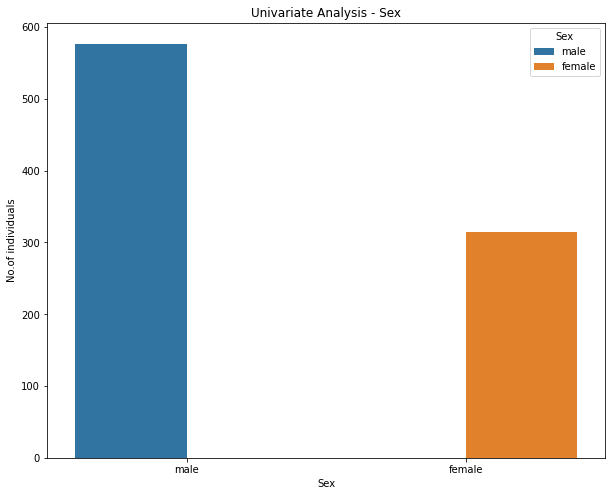

In [23]:
mlp.figure(figsize=(10,8))
sb.countplot(train_data["Sex"],hue=train_data["Sex"])
mlp.title("Univariate Analysis - Sex")
mlp.xlabel("Sex")
mlp.ylabel("No.of individuals")

*Insights-
The amount of "Male" is more than "Female" in training set. i.e. From the overall Titanic passengers,the ratio of "Male" is higher than "Female" in the ship.*

Text(0, 0.5, 'No.of individuals')

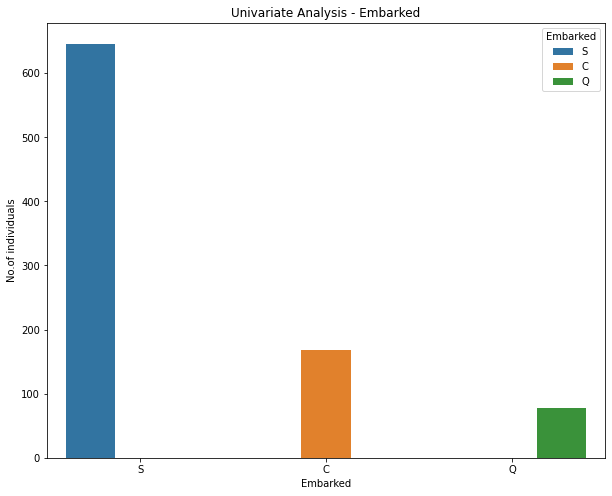

In [24]:
mlp.figure(figsize=(10,8))
sb.countplot(train_data["Embarked"],hue=train_data["Embarked"])
mlp.title("Univariate Analysis - Embarked")
mlp.xlabel("Embarked")
mlp.ylabel("No.of individuals")

*Insights-
From the overall Titanic passengers,"Southampton" has the highest no.of passengers than Cherbourg and Queenstown.*

**Univariate Analysis - Continuous Parameters**

In [25]:
con

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

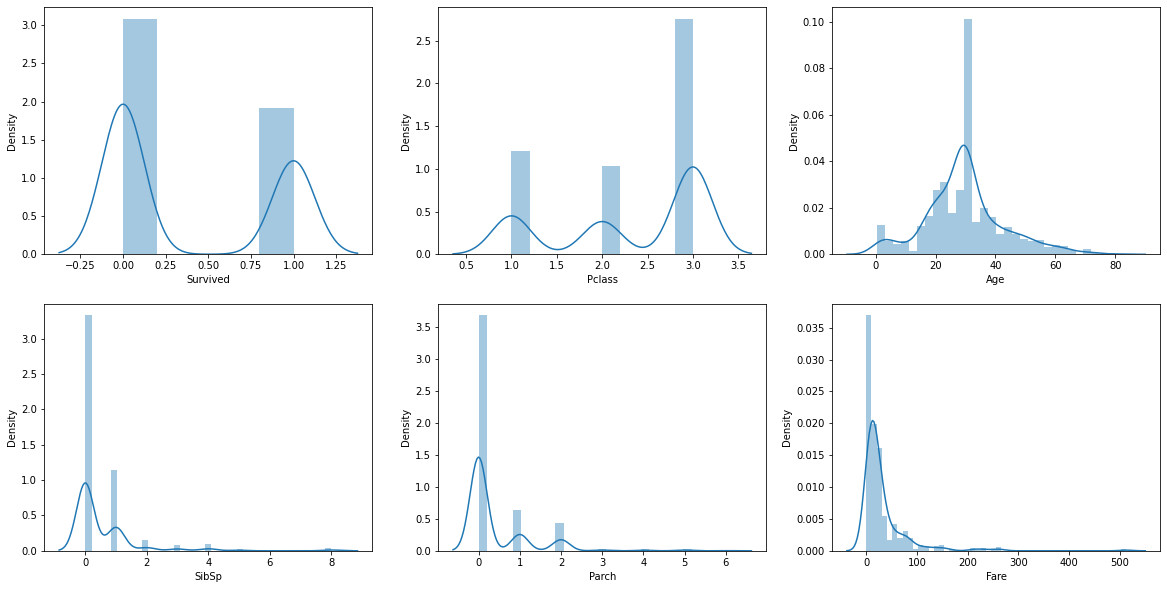

In [26]:
mlp.figure(figsize=(20,10))
x=1

for i in con:
    mlp.subplot(2,3,x)
    sb.distplot(train_data[i])
    x = x + 1

In [27]:
train_data[con].skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

**Bivariate Analysis - Categorical Parameters using Chi-square Test -**

In [28]:
cat

['Sex', 'Embarked']

*a) Chi-Square Test between "SEX" and "SURVIVED" -*

In [29]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train_data["Sex"],train_data["Survived"]))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

*b) Chi-Square Test between "EMBARKED" and "SURVIVED" -*

In [30]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train_data["Embarked"],train_data["Survived"]))

(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

In [31]:
csq_scores = {
    "Parameters" : ["Sex","Embarked"],
    "Chi-Square Test" : ["260.71702016732104","25.964452881874784"]
}

In [32]:
Chi_Square_Score = pd.DataFrame(data=csq_scores)

In [33]:
Chi_Square_Score

,Parameters,Chi-Square Test
0,Sex,260.71702016732104
1,Embarked,25.964452881874784


In [34]:
Chi_Square_Score["Chi-Square Test"] = Chi_Square_Score["Chi-Square Test"].astype(float)

**EDA of Chi-Square Test-**

Text(0.5, 0, 'Predictors')

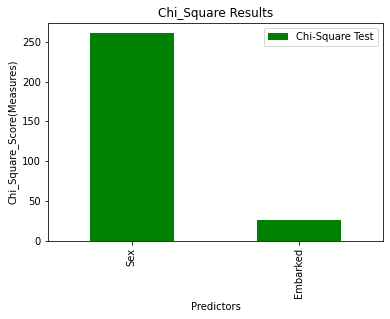

In [35]:
Chi_Square_Score.plot(x="Parameters",y="Chi-Square Test",kind="bar",color="green")
mlp.title("Chi_Square Results")
mlp.ylabel("Chi_Square_Score(Measures)")
mlp.xlabel("Predictors")

*Identifying the lowest p-values predictors for further models(p-val < 0.05)*

In [36]:
pvs_scores = {
    "Parameters" : ["Sex","Embarked"],
    "P-Value Score" : ["1.1973570627755645e-58","2.3008626481449577e-06"]
}

In [37]:
P_Value_Score = pd.DataFrame(data=pvs_scores)

In [38]:
P_Value_Score

,Parameters,P-Value Score
0,Sex,1.1973570627755645e-58
1,Embarked,2.3008626481449577e-06


In [39]:
P_Value_Score["P-Value Score"] = P_Value_Score["P-Value Score"].astype(float)

**EDA of Chi-Square Test and its P-value Score-**

Text(0.5, 0, 'Predictors')

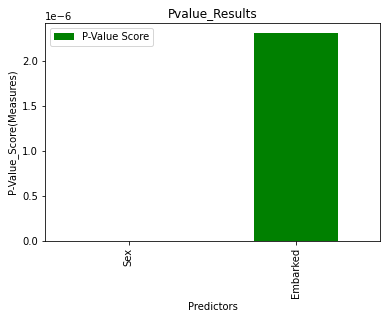

In [40]:
P_Value_Score.plot(x="Parameters",y="P-Value Score",kind="bar",color="green")
mlp.title("Pvalue_Results")
mlp.ylabel("P-Value_Score(Measures)")
mlp.xlabel("Predictors")

*Insights-
From the above graph, we can understand that both are important paramters as their P-value score is less than 0.05 ,so therefore these two columns will be considered for mdel predictions.*

**Bivariate Analysis - Continuous Parameters using ANOVA -**

In [41]:
con

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [42]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

*a) ANOVA Test between "PCLASS" and "SURVIVED" -*

In [43]:
anova_lm(ols("Pclass ~ Survived",data=train_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,71.276318,71.276318,115.031272,2.537047e-25
Residual,889.0,550.847138,0.619626,NaN,NaN


*b) ANOVA Test between "AGE" and "SURVIVED" -*

In [44]:
anova_lm(ols("Age ~ Survived",data=train_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,733.209612,733.209612,4.353516,0.037217
Residual,889.0,149723.426332,168.417802,NaN,NaN


*c) ANOVA Test between "SIBSP" and "SURVIVED" -*

In [45]:
anova_lm(ols("SibSp ~ Survived",data=train_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,1.350336,1.350336,1.110572,0.292244
Residual,889.0,1080.928003,1.215892,NaN,NaN


*d) ANOVA Test between "PARCH" and "SURVIVED" -*

In [46]:
anova_lm(ols("Parch ~ Survived",data=train_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,3.853142,3.853142,5.963464,0.014799
Residual,889.0,574.404995,0.646125,NaN,NaN


*e) ANOVA Test between "FARE" and "SURVIVED" -*

In [47]:
anova_lm(ols("Fare ~ Survived",data=train_data).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,1.455089e+05,145508.887663,63.030764,6.120189e-15
Residual,889.0,2.052290e+06,2308.537576,NaN,NaN


In [48]:
anv_scores = {
    'Parameters' : ["Pclass","Age","SibSp","Parch","Fare"],
    "ANOVA_Score" : ["2.537047e-25","0.037217","0.292244","0.014799","6.120189e-15"]
}

In [49]:
ANOVA_Result = pd.DataFrame(data=anv_scores)

In [50]:
ANOVA_Result

,Parameters,ANOVA_Score
0,Pclass,2.537047e-25
1,Age,0.037217
2,SibSp,0.292244
3,Parch,0.014799
4,Fare,6.120189e-15


In [51]:
ANOVA_Result["ANOVA_Score"] = ANOVA_Result["ANOVA_Score"].astype(float)

**EDA of ANOVA Score-**

<AxesSubplot:xlabel='Parameters'>

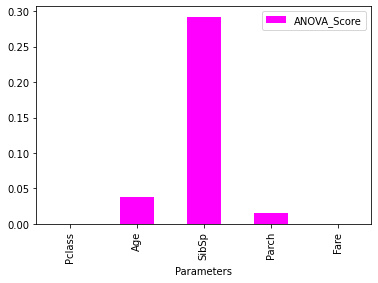

In [52]:
ANOVA_Result.plot(x = "Parameters",y = "ANOVA_Score",kind="bar",color="magenta")

*Insights-
From the above graph, we are eliminating "SibSp" from the dataset because ideal ANOVA score must be "less than 0.05" but here "ANOVA score of SibSp is 0.292244" i.e. greater than 0.05 so this column will be dropped and wont be used for further model preedictions.*

# ***7) Dropping unimportant columns for further model predictions-***

In [53]:
Y = train_data[["Survived"]]
X = train_data.drop(columns=["SibSp","Survived"],axis=1)

In [54]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [55]:
X

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,male,22.000000,0,7.2500,S
1,1,female,38.000000,0,71.2833,C
2,3,female,26.000000,0,7.9250,S
3,1,female,35.000000,0,53.1000,S
4,3,male,35.000000,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,27.000000,0,13.0000,S
887,1,female,19.000000,0,30.0000,S
888,3,female,29.699118,2,23.4500,S
889,1,male,26.000000,0,30.0000,C


In [56]:
#Using loops to differentiate
xcat = []
xcon = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        xcat.append(i)
    else:
        xcon.append(i)

In [57]:
xcon

['Pclass', 'Age', 'Parch', 'Fare']

In [58]:
xcat

['Sex', 'Embarked']

# ***8) Preprocessing of X and Y columns for further model predictions-***

**Feature Scaling-**

*Standardization of X - continuous columns-*

In [59]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
train_mnxcon =pd.DataFrame(mn.fit_transform(train_data[xcon]),columns=xcon)

In [60]:
train_mnxcon

,Pclass,Age,Parch,Fare
0,1.0,0.271174,0.000000,0.014151
1,0.0,0.472229,0.000000,0.139136
2,1.0,0.321438,0.000000,0.015469
3,0.0,0.434531,0.000000,0.103644
4,1.0,0.434531,0.000000,0.015713
...,...,...,...,...
886,0.5,0.334004,0.000000,0.025374
887,0.0,0.233476,0.000000,0.058556
888,1.0,0.367921,0.333333,0.045771
889,0.0,0.321438,0.000000,0.058556


*One hot encoding of Categorical columns-*

In [61]:
train_mnxcat = pd.get_dummies(train_data[xcat])
train_mnxcat

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [62]:
train_mnx = train_mnxcon.join(train_mnxcat)

In [63]:
train_mnx       #<----------------- STANDARDIZED TRAINING SET FOR FURTHER MODEL PREDICTIONS

,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.000000,0.014151,0,1,0,0,1
1,0.0,0.472229,0.000000,0.139136,1,0,1,0,0
2,1.0,0.321438,0.000000,0.015469,1,0,0,0,1
3,0.0,0.434531,0.000000,0.103644,1,0,0,0,1
4,1.0,0.434531,0.000000,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000000,0.025374,0,1,0,0,1
887,0.0,0.233476,0.000000,0.058556,1,0,0,0,1
888,1.0,0.367921,0.333333,0.045771,1,0,0,0,1
889,0.0,0.321438,0.000000,0.058556,0,1,1,0,0


# ***9)Divide data in training & testing set-***

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_mnx,Y,test_size=0.2,random_state=20)

In [65]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(712, 9)
(712, 1)
(179, 9)
(179, 1)


# ***MODEL PREDICTIONS-***

# ***10)  LOGISTIC REGRESSION MODEL FOR BINARY PREDICTIONS-***

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - LOGISTIC REGRESSION")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - LOGISTIC REGRESSION
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.794
Testing Data Accuracy Score -  0.8156
------------------------------------------------


# ***11) K-Nearest Neighbour Classifier Model -***

In [67]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=i)
    model = knc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

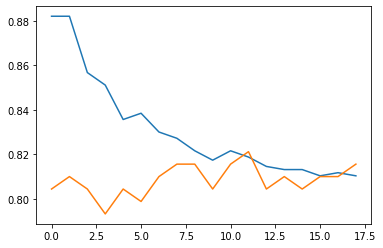

In [68]:
mlp.plot(tr)
mlp.plot(ts)

*GridSearch CV for best params-*

In [69]:
tg = {"n_neighbors":range(0,20,1)
     }
knc = KNeighborsClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV 
cv = GridSearchCV(knc,tg,scoring="accuracy",cv=5)
cvmodels = cv.fit(train_mnx,Y)
cvmodels.best_params_

{'n_neighbors': 12}

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=12)
model = knc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - K-Nearest Neighbour Classifier")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - K-Nearest Neighbour Classifier
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.822
Testing Data Accuracy Score -  0.8156
------------------------------------------------


# ***12) Decision Tree Classifier Model-***

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=20)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.985
Testing Data Accuracy Score -  0.8324
------------------------------------------------


*Max_Depth-*

In [73]:
tr = []
ts = []
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=20,max_depth=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

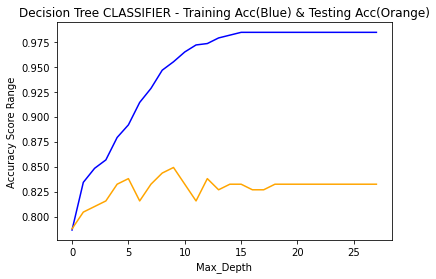

In [74]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree CLASSIFIER - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Max_Depth")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-(Max_depth)*

In [75]:
tg = {"max_depth":range(2,50,1),
     }
dtc = DecisionTreeClassifier(random_state=20)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=5)

cvmodel = cv.fit(train_mnx,Y)
cvmodel.best_params_

{'max_depth': 6}

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=20,max_depth=6)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier - Max Depth(11)")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier - Max Depth(11)
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.879
Testing Data Accuracy Score -  0.8324
------------------------------------------------


*Min_Samples_Split -*

In [77]:
tr = []
ts = []
for i in range(2,270,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=20,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

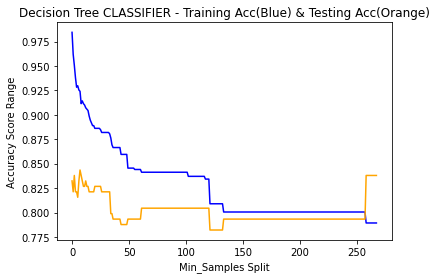

In [78]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree CLASSIFIER - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Min_Samples Split")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-(Min_Samples_Split)*

In [79]:
tg = {"min_samples_split":range(2,100,1),
     }
dtc = DecisionTreeClassifier(random_state=20)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=5)

cvmodel = cv.fit(train_mnx,Y)
cvmodel.best_params_

{'min_samples_split': 39}

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=20,min_samples_split=39)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier - Min Samples Split(39)")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier - Min Samples Split(39)
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.867
Testing Data Accuracy Score -  0.7933
------------------------------------------------


*Min_Leaf_Nodes-*

In [81]:
tr = []
ts = []
for i in range(2,60,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=20,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

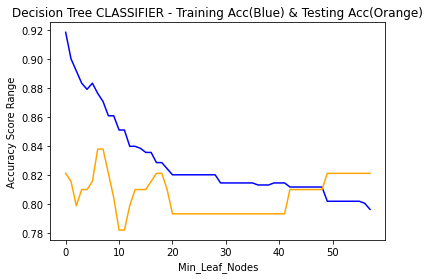

In [82]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree CLASSIFIER - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Min_Leaf_Nodes")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-(Min_Samples_Leaf)*

In [83]:
tg = {"min_samples_leaf":range(2,50,1),
     }
dtc = DecisionTreeClassifier(random_state=20)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=5)

cvmodel = cv.fit(train_mnx,Y)
cvmodel.best_params_

{'min_samples_leaf': 7}

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=20,min_samples_leaf=7)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier - Min Samples Leaf(7)")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier - Min Samples Leaf(7)
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.883
Testing Data Accuracy Score -  0.8156
------------------------------------------------


In [85]:
DTscores = {
    "Decision_Tree_Factors" : ["Max_Depth","Min_Samples_Split","Min_Samples_Leaf"],
    "Values" : ["6","39","7"],
    "Training_Acc_Scores" : ["0.879","0.867","0.883"],
    "Testing_Acc_Scores" : ["0.8324","0.7933","0.8156"]
}

In [86]:
Decision_Tree_Classifier = pd.DataFrame(data=DTscores)

In [87]:
Decision_Tree_Classifier

,Decision_Tree_Factors,Values,Training_Acc_Scores,Testing_Acc_Scores
0,Max_Depth,6,0.879,0.8324
1,Min_Samples_Split,39,0.867,0.7933
2,Min_Samples_Leaf,7,0.883,0.8156


# ***13) Random Forest Classifier Model-***

In [88]:
tr = []
ts = []
for i in range(2,15,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier (n_estimators=300,random_state=20,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

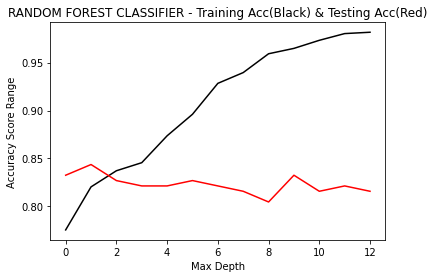

In [89]:
mlp.plot(tr,c="black")
mlp.plot(ts,c="red")
mlp.title("RANDOM FOREST CLASSIFIER - Training Acc(Black) & Testing Acc(Red)")
mlp.xlabel("Max Depth")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-*

In [90]:
tg = {"max_depth": range(0,40,1),
      "n_estimators" :[100,200,300]
     }
rfc = RandomForestClassifier(random_state=20)

In [91]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=5)
cvmodel = cv.fit(train_mnx,Y)
cvmodel.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=20,max_depth=8)
model = rfc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Random Forest Classifier")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Random Forest Classifier
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.923
Testing Data Accuracy Score -  0.8268
------------------------------------------------


# ***14) AdaBoost Classifier Model-***

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=20,max_depth=8),n_estimators=100)
model = abc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - ADA Boost Classifier")
print("Predicted Value(Y) - Survived")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - ADA Boost Classifier
Predicted Value(Y) - Survived
-----------------------------------------------
Training Data Accuracy Score -  0.985
Testing Data Accuracy Score -  0.8156
------------------------------------------------


# ***15) Feature Importance of Parameters-***

In [94]:
rfc = RandomForestClassifier(n_estimators=300,random_state=20,max_depth=17)
rfc.fit(train_mnx,Y)
rfc.feature_importances_

array([0.09414488, 0.26766198, 0.03788107, 0.27727445, 0.1364686 ,
       0.1537213 , 0.01212219, 0.00711733, 0.01360821])

In [95]:
pd.set_option("display.max_rows",200)
Important_Parameters = pd.DataFrame([train_mnx.columns,rfc.feature_importances_]).T
Important_Parameters.columns = ["Column_Name","Importance"]
Important_Parameters.sort_values(by="Importance",ascending=False)

,Column_Name,Importance
3,Fare,0.277274
1,Age,0.267662
5,Sex_male,0.153721
4,Sex_female,0.136469
0,Pclass,0.094145
2,Parch,0.037881
8,Embarked_S,0.013608
6,Embarked_C,0.012122
7,Embarked_Q,0.007117


*Insights-
These are the above important feature model parameters.*

# ***16) Overall Models Score Comparison-***

In [96]:
models= {
    "Models": ["Logistic Regression","KNN Classifier","Decision Tree Classifier","Random Forest Classifier","AdaBoost Classifier"],
    "Training Accuracy Score": ["0.794","0.822","0.985","0.923","0.985"],
    "Testing Accuracy Score": ["0.8156","0.8156","0.8324","0.8268","0.8212"]
}

In [97]:
Overall_Model_Comparison = pd.DataFrame(data=models)
Overall_Model_Comparison["Training Accuracy Score"] = Overall_Model_Comparison["Training Accuracy Score"].astype(float)
Overall_Model_Comparison["Testing Accuracy Score"] = Overall_Model_Comparison["Testing Accuracy Score"].astype(float)

In [98]:
Overall_Model_Comparison

,Models,Training Accuracy Score,Testing Accuracy Score
0,Logistic Regression,0.794,0.8156
1,KNN Classifier,0.822,0.8156
2,Decision Tree Classifier,0.985,0.8324
3,Random Forest Classifier,0.923,0.8268
4,AdaBoost Classifier,0.985,0.8212


Text(0.5, 1.0, 'Comparison of Training Accuracy Scores in various Models')

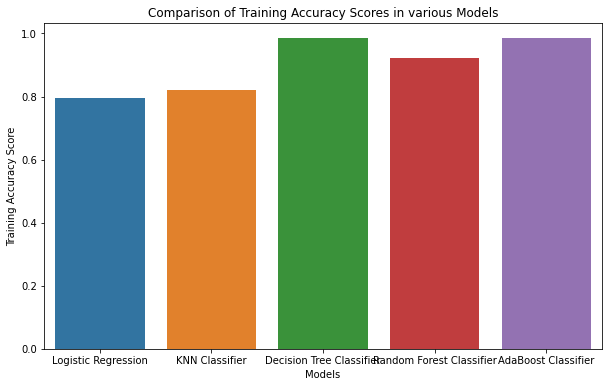

In [99]:
mlp.figure(figsize=(10,6))
sb.barplot(Overall_Model_Comparison["Models"],Overall_Model_Comparison["Training Accuracy Score"])
mlp.title("Comparison of Training Accuracy Scores in various Models")

*Insights-
From the overall models, we can identify that "Decision Tree,AdaBoost Classifier and Random Forest Classifier" models have the highest accuracy score of more than 95% than other models.*

Text(0.5, 1.0, 'Comparison of Testing Accuracy Scores in various Models')

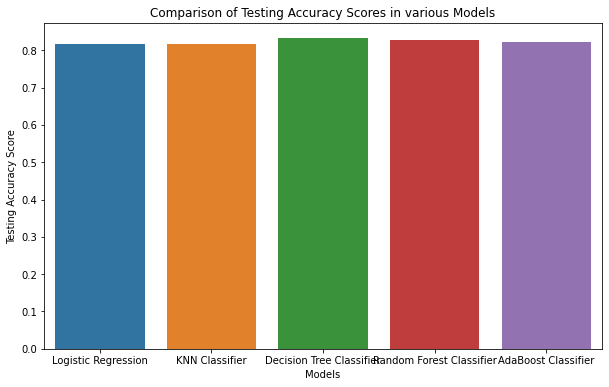

In [100]:
mlp.figure(figsize=(10,6))
sb.barplot(Overall_Model_Comparison["Models"],Overall_Model_Comparison["Testing Accuracy Score"])
mlp.title("Comparison of Testing Accuracy Scores in various Models")

# ***17) Applying the above model algorithms to testing data to idenitfy the predicted values -***

In [101]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [103]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [104]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [105]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Cabin           76
Embarked         3
dtype: int64

**Dropping unimportnat columns from test data -**

In [106]:
test_data = test_data.drop(columns=["Name","Ticket","Cabin"],axis=1)

**Seperation of testdata into categorical and continuous columns-**

In [107]:
tcat = []
tcon = []

for i in test_data.columns:
    if(test_data[i].dtypes == "object"):
        tcat.append(i)
    else:
        tcon.append(i)

In [108]:
tcat

['Sex', 'Embarked']

In [109]:
tcon

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**Feature Scaling of Test Dataset -**

*Standardization of X - continuous columns-*

In [110]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler ()
test_stdX1 = pd.DataFrame(mns.fit_transform(test_data[tcon]),columns=tcon)

In [111]:
test_stdX1

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.000000,1.0,0.452723,0.000,0.000000,0.015282
1,0.002398,1.0,0.617566,0.125,0.000000,0.013663
2,0.004796,0.5,0.815377,0.000,0.000000,0.018909
3,0.007194,1.0,0.353818,0.000,0.000000,0.016908
4,0.009592,1.0,0.287881,0.125,0.111111,0.023984
...,...,...,...,...,...,...
413,0.990408,1.0,0.396975,0.000,0.000000,0.015713
414,0.992806,0.0,0.512066,0.000,0.000000,0.212559
415,0.995204,1.0,0.505473,0.000,0.000000,0.014151
416,0.997602,1.0,0.396975,0.000,0.000000,0.015713


*One hot encoding of Categorical columns-*

In [112]:
test_stdX2 = pd.get_dummies(test_data[tcat])

In [113]:
test_stdX2

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
413,0,1,0,0,1
414,1,0,1,0,0
415,0,1,0,0,1
416,0,1,0,0,1


In [114]:
test_stdXA = test_stdX1.join(test_stdX2)

In [115]:
test_stdXA

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.452723,0.000,0.000000,0.015282,0,1,0,1,0
1,0.002398,1.0,0.617566,0.125,0.000000,0.013663,1,0,0,0,1
2,0.004796,0.5,0.815377,0.000,0.000000,0.018909,0,1,0,1,0
3,0.007194,1.0,0.353818,0.000,0.000000,0.016908,0,1,0,0,1
4,0.009592,1.0,0.287881,0.125,0.111111,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,0.396975,0.000,0.000000,0.015713,0,1,0,0,1
414,0.992806,0.0,0.512066,0.000,0.000000,0.212559,1,0,1,0,0
415,0.995204,1.0,0.505473,0.000,0.000000,0.014151,0,1,0,0,1
416,0.997602,1.0,0.396975,0.000,0.000000,0.015713,0,1,0,0,1


**FINAL MODEL -**

In [116]:
Final_Model = test_stdXA[xtrain.columns]

In [117]:
model.predict(Final_Model)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [118]:
Final_Prediction_Model = pd.DataFrame(test_data[["PassengerId"]])
Final_Prediction_Model["Survived"] =  model.predict(Final_Model)

In [119]:
pd.set_option("display.max_rows",500)
Final_Prediction_Model

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [120]:
Final_Prediction_Model.to_csv("submission.csv",index=False)
print("FP Model have been saved successfully!")

FP Model have been saved successfully!


# ***THANK YOU! OPEN FOR SUGGESTIONS AND CORRECTIONS RELATED TO MODEL!!***